In [2]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [3]:
xu = fb[fb.page_name == "高雄小金剛許智傑"]
# 把時間格式轉換
xu['new_date'] = pd.to_datetime(xu['created_time_taipei']).dt.date
xu['post_hour'] = pd.to_datetime(xu['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
xu['month_year'] = pd.to_datetime(xu['new_date']).dt.to_period('M')

xu.head(1)

<ipython-input-3-8a4a95bf0302>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xu['new_date'] = pd.to_datetime(xu['created_time_taipei']).dt.date
<ipython-input-3-8a4a95bf0302>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xu['post_hour'] = pd.to_datetime(xu['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-3-8a4a95bf0302>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
22084,279997645348476_2470560496292169,279997645348476,高雄小金剛許智傑,公眾人物,~喜迎豬年行動賀年~溫馨傳情關懷弱勢送春聯\n\n高雄市鳳山城進步協會每年舉辦~你捐發票、我送春聯，今年特別舉辦兩場: 1/12鳳山龍山寺上午9點-12點、1/13赤山文衡殿上午9點-12點，結合地方廟宇讓地方共襄盛舉，民眾更能感受愛心及文化的氣息。\n\n今年特地用Q版小胖卡車走出戶外，智傑也與書法大師一同揮毫響應活動，凡捐當月或107年11、12月發票三張，即可現場兌換大師揮毫毛筆春聯乙份，若持中低收入戶證明，免費送春聯一副(含邊緣戶)，現場報名領號碼牌前50名，集發票5張即可現場兌換喜氣福袋，每場限量50個。(每人限一份)\n\n智傑邀請您一起~做公益有意義、人生留下一段美好回憶，大家作伙來響應!\n發揮愛心、照顧弱勢、發展經濟，讓我們的社會處處有溫情。,NaN,photo,https://www.facebook.com/279997645348476/posts/2470560496292169/,2019-01-11T09:53:25+0000,2019-01-11T17:53:25,...,0,0,0,0,0,7,7,2019-01-11,17,2019-01


In [4]:
xu[xu.created_time_taipei == max(xu.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
22707,279997645348476_3181475681867310,279997645348476,高雄小金剛許智傑,公眾人物,您剛剛有到小英總部了嗎？\n\n看到現場人山人海，智傑非常感動，感謝高雄人一起站出來保護台灣，捍衛民主。\n\n明天拜託您一定要用投下手中神聖的一票，立委支持３號許智傑、總統支持3號蔡英文、政黨票14號民進黨！感謝🙏,高雄小金剛許智傑──和許智傑及其他 47 人，在捷運鳳山西站 MRT Fongshan West Station 。,photo,https://www.facebook.com/279997645348476/posts/3181475681867310/,2020-01-10T13:15:58+0000,2020-01-10T21:15:58,...,0,0,0,0,0,162,19,2020-01-10,21,2020-01


In [5]:
xu[xu.created_time_taipei == min(xu.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
22087,279997645348476_2457546590926893,279997645348476,高雄小金剛許智傑,公眾人物,看到潘局長的這則訊息，我覺得意外，本來只是很單純地私下鼓勵冰冰姐，感謝她幫高雄努力。我並不喜歡被操作，希望中央和地方用感恩和包容的心互相對待，共謀國家和城市的發展。\n 智傑重申：任何人對高雄有心要幫忙高雄，我都表示肯定和感謝，當然高雄市政府和交通部觀光局對全國觀光景點的深入規劃、提升品質、投入創意和資源，吸引全國甚至全世界的人愛來，才是我們應該要繼續努力的方向。\n 台灣加油！高雄加油！大家加油！\nhttps://www.chinatimes.com/realtimenews/20190102004043-260407,NaN,link,https://www.facebook.com/279997645348476/posts/2457546590926893/,2019-01-03T01:47:03+0000,2019-01-03T09:47:03,...,0,0,0,0,0,18,3,2019-01-03,9,2019-01


In [6]:
xu = xu.sort_values(by=['like_count'])
xu

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
22314,279997645348476_2783241708357378,279997645348476,高雄小金剛許智傑,公眾人物,NaN,高雄小金剛許智傑更新了近況。,status,https://www.facebook.com/279997645348476/posts/2783241708357378/,2019-07-09T01:54:48+0000,2019-07-09T09:54:48,...,0,0,0,0,0,0,0,2019-07-09,9,2019-07
22496,279997645348476_3001171236564423,279997645348476,高雄小金剛許智傑,公眾人物,NaN,高雄小金剛許智傑更新了近況。,status,https://www.facebook.com/279997645348476/posts/3001171236564423/,2019-10-26T09:32:15+0000,2019-10-26T17:32:15,...,0,0,0,0,0,0,0,2019-10-26,17,2019-10
22248,279997645348476_2683821954966021,279997645348476,高雄小金剛許智傑,公眾人物,～從風城變水城，論去年高雄市823泡水之戰～\n\n去年南台灣823大淹水，許多人說陳菊市長治水無效，滯洪池無效，導致路面出現5000個坑洞，其實是錯誤的講法，我們用科學來論述會比較客觀。\n\n第一、高雄市防洪排水量的設計和東京差不多，每小時若超過70毫米的降雨量，高雄和東京都會淹水。台北市較高一些，但每小時若超過80毫米的降雨量，台北市也會淹水。像去年823泡戰的降雨量每小時超過100毫米，所以瞬間下這麼大的豪雨，即時在台北市也承受不了，也必定會淹水。\n\n第二、去年823泡戰的總降雨量和2010年的凡納比颱風差不多，當年高雄市淹水面積大約有6000公頃左右，而同樣的降雨量在去年的淹水面積不到當年的1/10，這就是滯洪池和防洪設施進步發揮的功用，怎麼可以說滯洪池無效呢？\n\n第三、以鳳山赤山為例，鳳山赤山在縣市合併之後，智傑拜託陳菊市長幫忙做滯洪池，也順利完成，在滯洪池蓋好之後已經7年不淹水了，去年雨勢超大到雨水超過滯洪池的容量，有淹到水的住戶我們要說聲抱歉，我們再檢討改進，但是滯洪池真的有發揮功能的，否則一定會淹得更嚴重。\n \n第四、智傑問過工程專家，基本上高雄市的建設品質算是有水準，台灣的道路因為沒有設計共同管溝，因此不管是水管電路管線瓦斯管線有線電視管線等的加強和鋪設，道路就會被挖一次，這位專家表示一樣大的下雨情形若發生在新北市，恐怕也是5000個坑洞，因此共同管溝是台灣道路未來要思考的艱鉅的方向，但不能錯怪陳菊市長。\n \n第五、今年要檢視韓國瑜市長在防洪治水的努力，若最大降雨量在每小時70毫米以下還淹水，表示排水系統清污有問題；若降雨量超出每小時70毫米以上而淹水，這不能怪他，反而要看市府處理災變的能力和速度，以及他市長任內有沒有再規劃韌性城市的吸水功能；希望天佑高雄，高雄平安。\n\n總之，我們用科學來就事論事，在極端氣候的地球現狀，我們真的要更節能減碳保護地球，現實的問題也需要我們更認真克服，包括韌性城市的滯洪池和綠地等治水防洪功能的加強，以減少人民受苦。\n\n#小金剛在鳳山 #滯洪池,高雄小金剛許智傑──在赤山文衡殿。,link,https://www.facebook.com/279997645348476/posts/2683821954966021/,2019-05-18T13:54:05+0000,2019-05-18T21:54:05,...,0,0,0,0,0,4,0,2019-05-18,21,2019-05
22768,279997645348476_3146522448695967,279997645348476,高雄小金剛許智傑,公眾人物,台灣是主權獨立的國家\n智傑堅持捍衛台灣主權和民主自由！\n\n#唯一支持③許智傑\n#誠懇實在值得信賴\n#我鳳山我驕傲\n#鳳山台派大團結\n#延續建設靠智傑,高雄小金剛許智傑更新了封面相片。,photo,https://www.facebook.com/279997645348476/posts/3146522448695967/,2019-12-27T07:39:53+0000,2019-12-27T15:39:53,...,0,0,0,0,0,5,0,2019-12-27,15,2019-12
22107,279997645348476_2545679625446922,279997645348476,高雄小金剛許智傑,公眾人物,台灣智駕測試實驗室\n\n台灣第一座封閉自駕車測試場域「台灣智駕測試實驗室」今天在台南沙崙智慧綠能科學城開幕，總統蔡英文、前行政院長賴清德、台南市長黃偉哲、立委王定宇以及智傑一起體驗自駕車測試。\n\n其實驗室由科技部國家實驗研究院和車輛研究測試中心管理營運，目前已經和宏碁、中華電信數據通信分公司，以及成功大學等6家產業學研單位簽屬合作備忘錄，讓台灣的尖端科技邁入新的里程碑。\n\n台灣自駕車有很大的發展潛力，相關產業可以將Made in Taiwan再創高峰，大家一起努力!台灣加油!,NaN,photo,https://www.facebook.com/279997645348476/posts/2545679625446922/,2019-02-25T08:02:23+0000,2019-02-25T16:02:23,...,0,0,0,0,0,10,0,2019-02-25,16,2019-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22686,279997645348476_3125617634119782,279997645348476,高雄小金剛許智傑,公眾人物,總統③號蔡英文\n立委③號許智傑\n拜託鳳山的好朋友集中選票投③號！\n\n#3號智傑愛鳳山\n#3張選票顧台灣,NaN,video,https://www.facebook.com/279997645348476/posts/3125617634119782/,2019-12-18T03:13:23+0000,2019-12-18T11:13:23,...,0,0,0,0,0,196,65,2019-12-18,11,2019-12
22418,279997645348476_2884941411520740,279997645348476,高雄小金剛許智傑,公眾人物,雙J合體，力挺香港\n黃捷議員與智傑再度聯手出擊，一同參加埕市快閃第二回活動，高雄連儂牆留言聲援香港，並趁這次機會造訪附近在地年輕人經營的甜點店，向大家推薦「地方創生」的典範。\n\n活動將一路舉行到下午六點，有空的朋友歡迎到鹽埕區第一市場與我們相見歡（五福四路226號），智傑邀請您一起來連儂牆聲援香港、逛市集、吃美食！\n\n#高雄小金剛 #許智傑 #立委 #黃捷 #埕市集 #鹽埕 #市場 #高雄 #信的店 #埕市快閃 #香港 #連儂牆 #hongkong,高雄小金剛許智傑──在鹽埕第一公有市場。,photo,https://www.facebook.com/279997645348476/posts/2884941411520740/,2019-09-01T06:59:22+0000,2019-09-01T14:59:22,...,0,0,0,0,0,85,56,2019-09-01,14,2019-09
22700,279997645348476_589220778506630,279997645348476,高雄小金剛許智傑,公眾人物,翁立友來啦！翁立友 only you來總部啦！\n最後倒數一個月，一起來相挺許智傑,高雄小金剛許智傑的直播影片。,video,https://www.facebook.com/leer0105/videos/589220778506630/,2019-12-13T12:37:49+0000,2019-12-13T20:37:49,...,0,0,0,0,0,229,76,2019-12-13,20,2019-12
22725,279997645348476_3171689839512561,279997645348476,高雄小金剛許智傑,公眾人物,【請鳳山好友集中選票！保衛台灣！】\n蔡英文總統造訪智傑總部，親自呼籲鳳山的好友們集中選票！不要分票！③蔡英文一票！③許智傑一票！\n\n過去一年來，台灣面臨很多挑戰，但我們是勇敢的台灣人，風越大，我們越要向前行。台灣是我們最美麗溫暖的家，面對強權的文攻武嚇，我們一定要更堅定的守護台灣，保衛主權。\n\n懇請各位鳳山好友，我們都跟蔡總統一樣是

In [7]:
xu.reset_index(inplace=True)
xu

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
0,22314,279997645348476_2783241708357378,279997645348476,高雄小金剛許智傑,公眾人物,NaN,高雄小金剛許智傑更新了近況。,status,https://www.facebook.com/279997645348476/posts/2783241708357378/,2019-07-09T01:54:48+0000,...,0,0,0,0,0,0,0,2019-07-09,9,2019-07
1,22496,279997645348476_3001171236564423,279997645348476,高雄小金剛許智傑,公眾人物,NaN,高雄小金剛許智傑更新了近況。,status,https://www.facebook.com/279997645348476/posts/3001171236564423/,2019-10-26T09:32:15+0000,...,0,0,0,0,0,0,0,2019-10-26,17,2019-10
2,22248,279997645348476_2683821954966021,279997645348476,高雄小金剛許智傑,公眾人物,～從風城變水城，論去年高雄市823泡水之戰～\n\n去年南台灣823大淹水，許多人說陳菊市長治水無效，滯洪池無效，導致路面出現5000個坑洞，其實是錯誤的講法，我們用科學來論述會比較客觀。\n\n第一、高雄市防洪排水量的設計和東京差不多，每小時若超過70毫米的降雨量，高雄和東京都會淹水。台北市較高一些，但每小時若超過80毫米的降雨量，台北市也會淹水。像去年823泡戰的降雨量每小時超過100毫米，所以瞬間下這麼大的豪雨，即時在台北市也承受不了，也必定會淹水。\n\n第二、去年823泡戰的總降雨量和2010年的凡納比颱風差不多，當年高雄市淹水面積大約有6000公頃左右，而同樣的降雨量在去年的淹水面積不到當年的1/10，這就是滯洪池和防洪設施進步發揮的功用，怎麼可以說滯洪池無效呢？\n\n第三、以鳳山赤山為例，鳳山赤山在縣市合併之後，智傑拜託陳菊市長幫忙做滯洪池，也順利完成，在滯洪池蓋好之後已經7年不淹水了，去年雨勢超大到雨水超過滯洪池的容量，有淹到水的住戶我們要說聲抱歉，我們再檢討改進，但是滯洪池真的有發揮功能的，否則一定會淹得更嚴重。\n \n第四、智傑問過工程專家，基本上高雄市的建設品質算是有水準，台灣的道路因為沒有設計共同管溝，因此不管是水管電路管線瓦斯管線有線電視管線等的加強和鋪設，道路就會被挖一次，這位專家表示一樣大的下雨情形若發生在新北市，恐怕也是5000個坑洞，因此共同管溝是台灣道路未來要思考的艱鉅的方向，但不能錯怪陳菊市長。\n \n第五、今年要檢視韓國瑜市長在防洪治水的努力，若最大降雨量在每小時70毫米以下還淹水，表示排水系統清污有問題；若降雨量超出每小時70毫米以上而淹水，這不能怪他，反而要看市府處理災變的能力和速度，以及他市長任內有沒有再規劃韌性城市的吸水功能；希望天佑高雄，高雄平安。\n\n總之，我們用科學來就事論事，在極端氣候的地球現狀，我們真的要更節能減碳保護地球，現實的問題也需要我們更認真克服，包括韌性城市的滯洪池和綠地等治水防洪功能的加強，以減少人民受苦。\n\n#小金剛在鳳山 #滯洪池,高雄小金剛許智傑──在赤山文衡殿。,link,https://www.facebook.com/279997645348476/posts/2683821954966021/,2019-05-18T13:54:05+0000,...,0,0,0,0,0,4,0,2019-05-18,21,2019-05
3,22768,279997645348476_3146522448695967,279997645348476,高雄小金剛許智傑,公眾人物,台灣是主權獨立的國家\n智傑堅持捍衛台灣主權和民主自由！\n\n#唯一支持③許智傑\n#誠懇實在值得信賴\n#我鳳山我驕傲\n#鳳山台派大團結\n#延續建設靠智傑,高雄小金剛許智傑更新了封面相片。,photo,https://www.facebook.com/279997645348476/posts/3146522448695967/,2019-12-27T07:39:53+0000,...,0,0,0,0,0,5,0,2019-12-27,15,2019-12
4,22107,279997645348476_2545679625446922,279997645348476,高雄小金剛許智傑,公眾人物,台灣智駕測試實驗室\n\n台灣第一座封閉自駕車測試場域「台灣智駕測試實驗室」今天在台南沙崙智慧綠能科學城開幕，總統蔡英文、前行政院長賴清德、台南市長黃偉哲、立委王定宇以及智傑一起體驗自駕車測試。\n\n其實驗室由科技部國家實驗研究院和車輛研究測試中心管理營運，目前已經和宏碁、中華電信數據通信分公司，以及成功大學等6家產業學研單位簽屬合作備忘錄，讓台灣的尖端科技邁入新的里程碑。\n\n台灣自駕車有很大的發展潛力，相關產業可以將Made in Taiwan再創高峰，大家一起努力!台灣加油!,NaN,photo,https://www.facebook.com/279997645348476/posts/2545679625446922/,2019-02-25T08:02:23+0000,...,0,0,0,0,0,10,0,2019-02-25,16,2019-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,22686,279997645348476_3125617634119782,279997645348476,高雄小金剛許智傑,公眾人物,總統③號蔡英文\n立委③號許智傑\n拜託鳳山的好朋友集中選票投③號！\n\n#3號智傑愛鳳山\n#3張選票顧台灣,NaN,video,https://www.facebook.com/279997645348476/posts/3125617634119782/,2019-12-18T03:13:23+0000,...,0,0,0,0,0,196,65,2019-12-18,11,2019-12
683,22418,279997645348476_2884941411520740,279997645348476,高雄小金剛許智傑,公眾人物,雙J合體，力挺香港\n黃捷議員與智傑再度聯手出擊，一同參加埕市快閃第二回活動，高雄連儂牆留言聲援香港，並趁這次機會造訪附近在地年輕人經營的甜點店，向大家推薦「地方創生」的典範。\n\n活動將一路舉行到下午六點，有空的朋友歡迎到鹽埕區第一市場與我們相見歡（五福四路226號），智傑邀請您一起來連儂牆聲援香港、逛市集、吃美食！\n\n#高雄小金剛 #許智傑 #立委 #黃捷 #埕市集 #鹽埕 #市場 #高雄 #信的店 #埕市快閃 #香港 #連儂牆 #hongkong,高雄小金剛許智傑──在鹽埕第一公有市場。,photo,https://www.facebook.com/279997645348476/posts/2884941411520740/,2019-09-01T06:59:22+0000,...,0,0,0,0,0,85,56,2019-09-01,14,2019-09
684,22700,279997645348476_589220778506630,279997645348476,高雄小金剛許智傑,公眾人物,翁立友來啦！翁立友 only you來總部啦！\n最後倒數一個月，一起來相挺許智傑,高雄小金剛許智傑的直播影片。,video,https://www.facebook.com/leer0105/videos/589220778506630/,2019-12-13T12:37:49+0000,...,0,0,0,0,0,229,76,2019-12-13,20,2019-12
685,22725,279997645348476_3171689839512561,279997645348476,高雄小金剛許智傑,公眾人物,【請鳳山好友集中選票！保衛台灣！】\n蔡英文總統造訪智傑總部，親自呼籲鳳山的好友們集中選票！不要分票！③蔡英文一票！③許智傑一票！\n\n過去一年來，台灣面臨很多挑戰，但我們是勇敢的台灣人，風越大，我們越要向前行。台灣是我們最美麗溫暖的家，面對強權的文攻武嚇，我們一定要更堅定的守護台灣，保衛主權。\n\n懇請各位鳳山好友，我們都跟蔡總統一樣是「台灣隊長」，請各位台派團結，集中選票，不要分票，2020年1月11日，③蔡英文一票，③許智傑一票。,高雄小金剛許智傑──在高雄小金剛許智傑。,photo,https://www.facebook.com/279997645348476/posts/3171689839512561/,2020-

結巴斷詞 jieba

len(liu): 看劉櫂豪的貼文總共有幾筆
list(liu['message']): 把要斷詞的內容轉成 list 格式
創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [8]:
doc_names = range(len(xu)) #許智傑有幾篇文章
doc_names

range(0, 687)

In [9]:
import numpy as np
xu = xu.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(xu['message'])
xu_docs = pd.DataFrame(columns=['jieba_results'])
xu_docs['jieba_results'] = xu_docs['jieba_results'].astype('str')

In [11]:
words = jieba.lcut(text_list[2], cut_all = False)
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yangs\AppData\Local\Temp\jieba.cache
Loading model cost 1.244 seconds.
Prefix dict has been built successfully.


['～', '從', '風城變', '水城', '，', '論', '去年', '高雄市', '823', '泡水', '之戰', '～', '\n', '\n', '去年', '南台', '灣', '823', '大', '淹水', '，', '許多人', '說', '陳', '菊', '市長', '治水', '無效', '，', '滯洪池', '無效', '，', '導致', '路面', '出現', '5000', '個', '坑洞', '，', '其實', '是', '錯誤', '的', '講法', '，', '我們', '用', '科學來', '論述', '會', '比', '較', '客觀', '。', '\n', '\n', '第一', '、', '高雄市', '防洪', '排水量', '的', '設計', '和', '東京', '差不多', '，', '每小時', '若', '超過', '70', '毫米', '的', '降雨量', '，', '高雄', '和', '東', '京都', '會', '淹水', '。', '台北市', '較', '高', '一些', '，', '但', '每小時', '若', '超過', '80', '毫米', '的', '降雨量', '，', '台北市', '也', '會', '淹水', '。', '像', '去年', '823', '泡戰', '的', '降雨量', '每小時', '超過', '100', '毫米', '，', '所以', '瞬間', '下', '這麼', '大', '的', '豪雨', '，', '即時', '在', '台北市', '也', '承受', '不了', '，', '也', '必定', '會', '淹水', '。', '\n', '\n', '第二', '、', '去年', '823', '泡戰', '的', '總', '降雨量', '和', '2010', '年', '的', '凡納', '比', '颱', '風', '差不多', '，', '當年', '高雄市', '淹', '水面', '積大約', '有', '6000', '公頃', '左右', '，', '而', '同樣', '的', '降雨量', '在', '去年', '的', '淹', '水面', '積', '不到', '當年'

In [12]:
words = jieba.lcut(text_list[686], cut_all = False)
print(words)

['最', '後', '2', '③', '天', '！', '我', '23', '歲', '的', '女兒', '從', '澳洲', '學成', '歸國', '，', '幫', '③', '智傑', '拉票', '\n', '\n', '我', '心中', '最想', '見', '的', '神秘', '嘉賓', '是', '我', '最', '可愛的', '女兒', '！', '她', '在', '澳洲', '求學', '三年', '，', '很', '可惜', '無法親', '自到', '澳洲', '參加', '畢業', '典禮', '，', '但', '我', '的', '心', '跟', '她', '同', '在', '！', '\n', '\n', '女兒', '從', '我', '在', '選', '代表', '就', '開始', '跟', '在', '我', '身邊', '助選', '，', '還記', '得', '在', '拜票', '，', '\n', '有人', '跟', '女兒', '說', '：', '我', '不', '支持', '你', '爸爸', '\n', '女兒', '居然', '一秒', '落淚', '，', '哭', '著', '說', '：', '拜', '託', '支持', '我', '爸爸', '\n', '嚇得', '大哥', '直說', '：', '我開', '玩笑', '的', '啦', '！', '挖系', '支持', '拎', '阿爸', '啦', '！', '\n', '\n', '回', '想起', '從', '老師', '轉行', '從政', '，', '一路', '來', '家人', '都', '大力支持', '，', '感謝', '我', '最愛的', '家人', '們', '！', '現在', '女兒', '也', '加入', '一起', '輔選', '，', '讓', '我', '更', '有', '信心', '，', '要', '打造', '鳳山成', '為', '更好', '的', '城市', '！', '拜', '託', '您', '唯一', '支持', '③', '許智傑', '！']


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [13]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    xu_docs = xu_docs.append(s, ignore_index=True)#每次的斷詞結果都加回kuan_docs

In [14]:
xu_docs

,jieba_results
0,
1,
2,從 風城變 水城 論 去年 高雄市 泡水 之戰 去年 南 台灣 大 淹水 許多人 說 陳 菊 市長 治水 無效 滯洪池 無效 導致 路面 出現 個 坑洞 其實 是 錯誤 的 講法 我們 用 科學來 論述 會 比 較 客觀 。 第一 高雄市 防洪 排水量 的 設計 和 東京 差不多 每小時 若 超過 毫米 的 降雨量 高雄 和 東 京都 會 淹水 。 台北市 較 高 一些 但 每小時 若 超過 毫米 的 降雨量 台北市 也 會 淹水 。 像 去年 泡戰 的 降雨量 每小時 超過 毫米 所以 瞬間 下 這麼 大 的 豪雨 即時 在 台北市 也 承受 不了 也 必定 會 淹水 。 第二 去年 泡戰 的 總 降雨量 和 年 的 凡納 比 颱 風 差不多 當年 高雄市 淹 水面 積大約 有 公頃 左右 而 同樣 的 降雨量 在 去年 的 淹 水面 積 不到 當年 的 / 這 就是 滯洪池 和 防洪 設施 進步 發揮 的 功用 怎麼 可以 說滯 洪池 無效 呢 第三 以鳳山 赤山 為例 鳳山 赤山 在 縣 市合 併 之 後 智傑 拜 託 陳 菊 市長 幫忙 做 滯洪池 也 順利 完成 在 滯洪池 蓋 好 之 後 已經 年 不 淹水 了 去年 雨勢 超大 到 雨水 超過 滯洪池 的 容量 有 淹到 水 的 住戶 我們 要 說 聲 抱歉 我們 再 檢討 改進 但是 滯洪池 真的 有 發揮 功能 的 否則 一定 會 淹得 更 嚴重 。 第四 智傑 問過 工程 專家 基本上 高雄市 的 建設 品質 算是 有水準 台灣 的 道路 因為 沒有 設計 共同 管溝 因此 不管 是 水管 電路 管線 瓦斯 管線 有線 電視 管線 等 的 加強 和 鋪 設 道路 就 會 被 挖 一次 這位 專家 表示 一樣 大 的 下雨 情形 若 發生 在 新北市 恐怕 也 是 個 坑洞 因此 共同 管溝 是 台灣 道路 未來 要 思考 的 艱鉅 的 方向 但 不能 錯怪 陳 菊 市長 。 第五 今年 要 檢視 韓國瑜 市長 在 防洪 治水 的 努力 若 最大 降雨量 在 每小時 毫米 以下 還 淹水 表示 排水 系統 清污 有 問題 若 降雨量 超出 每小時 毫米 以上 而 淹水 這 不能 怪 他 反而 要 看 市府 處理 災變 的 能力 和 速度 以及 他 市長 任內 有 沒 有 再 規劃 韌性 城市 的 吸水 功能 希望 天佑 高雄 高雄 平安 。 總 之 我們 用 科學來 就 事論 事 在 極端 氣候 的 地球 現狀 我們 真的 要 更 節能 減碳 保護 地球 現實 的 問題 也 需要 我們 更 認真 克服 包括 韌性 城市 的 滯洪池 和 綠地 等 治水 防洪 功能 的 加強 以 減少 人民 受苦 。 # 小金 剛在 鳳山 # 滯洪池
3,台灣 是 主權 獨立 的 國家 智傑 堅持 捍衛 台灣 主權 和 民主自由 # 唯一 支持 ③ 許智傑 # 誠懇實 在 值得 信賴 # 我鳳山 我 驕傲 # 鳳山台 派 大團結 # 延續 建設 靠 智傑
4,台灣 智駕 測試 實驗室 台灣 第一座 封閉 自駕 車測 試場域 台灣 智駕 測試 實驗室 今天 在 台 南沙 崙 智慧 綠能 科學城 開幕 總統 蔡英文 前 行政院 長 賴清德 台南市 長 黃 偉哲 立委 王定宇 以及 智傑 一起 體驗 自駕車 測試 。 其 實驗室 由 科技部 國家 實驗 研究院 和 車輛 研究 測試 中心 管理 營運 目前 已經 和 宏碁 中華電信 數據 通信 分公司 以及 成功 大學 等 家 產業 學研 單位 簽屬 合作 備忘錄 讓 台灣 的 尖端科技 邁入 新 的 里程碑 。 台灣 自駕車 有 很大 的 發展 潛力 相關 產業 可以 將 再創 高峰 大家 一起 努力 台灣 加油 !
...,...
682,總統 ③ 號 蔡英文 立委 ③ 號許 智傑 拜 託 鳳山 的 好 朋友 集中 選票 投 ③ 號 # 號智傑 愛鳳山 # 張選票 顧 台灣
683,雙 合體 力挺 香港 黃 捷議員 與 智傑 再度 聯手 出擊 一同 參加 埕 市 快 閃 第二回 活動 高雄 連儂 牆 留言 聲援 香港 並趁 這次 機會 造訪 附近 在 地 年輕人 經營 的 甜點 店 向 大家 推薦 地方 創生 的 典範 。 活動將 一路 舉行 到 下午 六點 有空 的 朋友 歡迎 到 鹽埕 區 第一 市場 與 我們 相見歡 五福 四路 號 智傑 邀請 您 一起 來 連儂 牆 聲援 香港 逛 市集 吃 美食 # 高雄 小金 剛 # 許智傑 # 立委 # 黃 捷 # 埕 市集 # 鹽埕 # 市場 # 高雄 # 信 的 店 # 埕 市 快 閃 # 香港 # 連儂 牆 #
684,翁立友 來 啦 翁立友 來 總部 啦 最後倒 數一個 月 一起 來 相挺 許智傑
685,請鳳山 好友 集中 選票 保衛 台灣 蔡英文 總統 造訪 智傑 總部 親自 呼籲 鳳山 的 好友 們 集中 選票 不要 分票 ③ 蔡英文 一票 ③ 許智傑 一票 過去 一年 來 台灣 面臨 很多 挑戰 但 我們 是 勇敢 的 台灣 人 風越 大 我們 越要 向前 行 。 台灣 是 我們 最美 麗溫 暖 的 家 面對 強權 的 文攻武 嚇 我們 一定 要 更 堅定 的 守護 台灣 保衛主權 。 懇請 各位 鳳山 好友 我們 都 跟 蔡總統 一樣 是 台灣 隊長 請 各位 台派 團結 集中 選票 不要 分票 年 月 日 ③ 蔡英文 一票 ③ 許智傑 一票 。


In [15]:
xu['jieba_results'] = xu_docs
xu_post = xu[['new_date','message','jieba_results','like_count']]
xu_post


,new_date,message,jieba_results,like_count
0,2019-07-09,,,0
1,2019-10-26,,,0
2,2019-05-18,～從風城變水城，論去年高雄市823泡水之戰～\n\n去年南台灣823大淹水，許多人說陳菊市長治水無效，滯洪池無效，導致路面出現5000個坑洞，其實是錯誤的講法，我們用科學來論述會比較客觀。\n\n第一、高雄市防洪排水量的設計和東京差不多，每小時若超過70毫米的降雨量，高雄和東京都會淹水。台北市較高一些，但每小時若超過80毫米的降雨量，台北市也會淹水。像去年823泡戰的降雨量每小時超過100毫米，所以瞬間下這麼大的豪雨，即時在台北市也承受不了，也必定會淹水。\n\n第二、去年823泡戰的總降雨量和2010年的凡納比颱風差不多，當年高雄市淹水面積大約有6000公頃左右，而同樣的降雨量在去年的淹水面積不到當年的1/10，這就是滯洪池和防洪設施進步發揮的功用，怎麼可以說滯洪池無效呢？\n\n第三、以鳳山赤山為例，鳳山赤山在縣市合併之後，智傑拜託陳菊市長幫忙做滯洪池，也順利完成，在滯洪池蓋好之後已經7年不淹水了，去年雨勢超大到雨水超過滯洪池的容量，有淹到水的住戶我們要說聲抱歉，我們再檢討改進，但是滯洪池真的有發揮功能的，否則一定會淹得更嚴重。\n \n第四、智傑問過工程專家，基本上高雄市的建設品質算是有水準，台灣的道路因為沒有設計共同管溝，因此不管是水管電路管線瓦斯管線有線電視管線等的加強和鋪設，道路就會被挖一次，這位專家表示一樣大的下雨情形若發生在新北市，恐怕也是5000個坑洞，因此共同管溝是台灣道路未來要思考的艱鉅的方向，但不能錯怪陳菊市長。\n \n第五、今年要檢視韓國瑜市長在防洪治水的努力，若最大降雨量在每小時70毫米以下還淹水，表示排水系統清污有問題；若降雨量超出每小時70毫米以上而淹水，這不能怪他，反而要看市府處理災變的能力和速度，以及他市長任內有沒有再規劃韌性城市的吸水功能；希望天佑高雄，高雄平安。\n\n總之，我們用科學來就事論事，在極端氣候的地球現狀，我們真的要更節能減碳保護地球，現實的問題也需要我們更認真克服，包括韌性城市的滯洪池和綠地等治水防洪功能的加強，以減少人民受苦。\n\n#小金剛在鳳山 #滯洪池,從 風城變 水城 論 去年 高雄市 泡水 之戰 去年 南 台灣 大 淹水 許多人 說 陳 菊 市長 治水 無效 滯洪池 無效 導致 路面 出現 個 坑洞 其實 是 錯誤 的 講法 我們 用 科學來 論述 會 比 較 客觀 。 第一 高雄市 防洪 排水量 的 設計 和 東京 差不多 每小時 若 超過 毫米 的 降雨量 高雄 和 東 京都 會 淹水 。 台北市 較 高 一些 但 每小時 若 超過 毫米 的 降雨量 台北市 也 會 淹水 。 像 去年 泡戰 的 降雨量 每小時 超過 毫米 所以 瞬間 下 這麼 大 的 豪雨 即時 在 台北市 也 承受 不了 也 必定 會 淹水 。 第二 去年 泡戰 的 總 降雨量 和 年 的 凡納 比 颱 風 差不多 當年 高雄市 淹 水面 積大約 有 公頃 左右 而 同樣 的 降雨量 在 去年 的 淹 水面 積 不到 當年 的 / 這 就是 滯洪池 和 防洪 設施 進步 發揮 的 功用 怎麼 可以 說滯 洪池 無效 呢 第三 以鳳山 赤山 為例 鳳山 赤山 在 縣 市合 併 之 後 智傑 拜 託 陳 菊 市長 幫忙 做 滯洪池 也 順利 完成 在 滯洪池 蓋 好 之 後 已經 年 不 淹水 了 去年 雨勢 超大 到 雨水 超過 滯洪池 的 容量 有 淹到 水 的 住戶 我們 要 說 聲 抱歉 我們 再 檢討 改進 但是 滯洪池 真的 有 發揮 功能 的 否則 一定 會 淹得 更 嚴重 。 第四 智傑 問過 工程 專家 基本上 高雄市 的 建設 品質 算是 有水準 台灣 的 道路 因為 沒有 設計 共同 管溝 因此 不管 是 水管 電路 管線 瓦斯 管線 有線 電視 管線 等 的 加強 和 鋪 設 道路 就 會 被 挖 一次 這位 專家 表示 一樣 大 的 下雨 情形 若 發生 在 新北市 恐怕 也 是 個 坑洞 因此 共同 管溝 是 台灣 道路 未來 要 思考 的 艱鉅 的 方向 但 不能 錯怪 陳 菊 市長 。 第五 今年 要 檢視 韓國瑜 市長 在 防洪 治水 的 努力 若 最大 降雨量 在 每小時 毫米 以下 還 淹水 表示 排水 系統 清污 有 問題 若 降雨量 超出 每小時 毫米 以上 而 淹水 這 不能 怪 他 反而 要 看 市府 處理 災變 的 能力 和 速度 以及 他 市長 任內 有 沒 有 再 規劃 韌性 城市 的 吸水 功能 希望 天佑 高雄 高雄 平安 。 總 之 我們 用 科學來 就 事論 事 在 極端 氣候 的 地球 現狀 我們 真的 要 更 節能 減碳 保護 地球 現實 的 問題 也 需要 我們 更 認真 克服 包括 韌性 城市 的 滯洪池 和 綠地 等 治水 防洪 功能 的 加強 以 減少 人民 受苦 。 # 小金 剛在 鳳山 # 滯洪池,36
3,2019-12-27,台灣是主權獨立的國家\n智傑堅持捍衛台灣主權和民主自由！\n\n#唯一支持③許智傑\n#誠懇實在值得信賴\n#我鳳山我驕傲\n#鳳山台派大團結\n#延續建設靠智傑,台灣 是 主權 獨立 的 國家 智傑 堅持 捍衛 台灣 主權 和 民主自由 # 唯一 支持 ③ 許智傑 # 誠懇實 在 值得 信賴 # 我鳳山 我 驕傲 # 鳳山台 派 大團結 # 延續 建設 靠 智傑,40
4,2019-02-25,台灣智駕測試實驗室\n\n台灣第一座封閉自駕車測試場域「台灣智駕測試實驗室」今天在台南沙崙智慧綠能科學城開幕，總統蔡英文、前行政院長賴清德、台南市長黃偉哲、立委王定宇以及智傑一起體驗自駕車測試。\n\n其實驗室由科技部國家實驗研究院和車輛研究測試中心管理營運，目前已經和宏碁、中華電信數據通信分公司，以及成功大學等6家產業學研單位簽屬合作備忘錄，讓台灣的尖端科技邁入新的里程碑。\n\n台灣自駕車有很大的發展潛力，相關產業可以將Made in Taiwan再創高峰，大家一起努力!台灣加油!,台灣 智駕 測試 實驗室 台灣 第一座 封閉 自駕 車測 試場域 台灣 智駕 測試 實驗室 今天 在 台 南沙 崙 智慧 綠能 科學城 開幕 總統 蔡英文 前 行政院 長 賴清德 台南市 長 黃 偉哲 立委 王定宇 以及 智傑 一起 體驗 自駕車 測試 。 其 實驗室 由 科技部 國家 實驗 研究院 和 車輛 研究 測試 中心 管理 營運 目前 已經 和 宏碁 中華電信 數據 通信 分公司 以及 成功 大學 等 家 產業 學研 單位 簽屬 合作 備忘錄 讓 台灣 的 尖端科技 邁入 新 的 里程碑 。 台灣 自駕車 有 很大 的 發展 潛力 相關 產業 可以 將 再創 高峰 大家 一起 努力 台灣 加油 !,44
...,...,...,...,...
682,2019-12-18,總統③號蔡英文\n立委③號許智傑\n拜託鳳山的好朋友集中選票投③號！\n\n#3號智傑愛鳳山\n#3張選票顧台灣,總統 ③ 號 蔡英文 立委 ③ 號許 智傑 拜 託 鳳山 的 好 朋友 集中 選票 投 ③ 號 # 號智傑 愛鳳山 # 張選票 顧 台灣,3385
683,2019-09-01,雙J合體，力挺香港\n黃捷議員與智傑再度聯手出擊，一同參加埕市快閃第二回活動，高雄連儂牆留言聲援香港，並趁這次機會造訪附近在地年輕人經營的甜點店，向大家推薦「地方創生」的典範。\n\n活動將一路舉行到下午六點，有空的朋友歡迎到鹽埕區第一市場與我們相見歡（五福四路226號），智傑邀請您一起來連儂牆聲援香港、逛市集、吃美食！\n\n#高雄小金剛 #許智傑 #立委 #黃捷 #埕市集 #鹽埕 #市場 #高雄 #信的店 #埕市快閃 #香港 #連儂牆 #hongkong,雙 合體 力挺 香港 黃 捷議員 與 智傑 再度 聯手 出擊 一同 參加 埕 市 快 閃 第二回 活動 高雄 連儂 牆 留言 聲援 香港 並趁 這次 機會 造訪 附近 在 地 年輕人 經營 的 甜點 店 向 大家 推薦 地方 創生 的 典範 。 活動將 一路 舉行 到 下午 六點 有空 的 朋友 歡迎 到 鹽埕 區 第一 市場 與 我們 相見歡 五福 四路 號 智傑 邀請 您 一起 來 連儂 牆 聲援 香港 逛 市集 吃 美食 # 高雄 小金 剛 # 許智傑 # 立委 # 黃 捷 # 埕 市集 # 鹽埕 # 市場 # 高雄 # 信 的 店 # 埕 市 快 閃 # 香港 # 連儂 牆 #,3918
684,2019-12-13,翁立友來啦！翁立友 only you來總部啦！\n最後倒數一個月，一起來相挺許智傑,翁立友 來 啦 翁立友 來 總部 啦 最後倒 數一個 月 一起 來 相挺 許智傑,3926
685,2020-01-06,【請鳳山好友集中選票！保衛台灣！】\n蔡英文總統造訪智傑總部，親自呼籲鳳山的好友們集中選票！不要分票！③蔡英文一票！③許智傑一票！\n\n過去一年來，台灣面臨很多挑戰，但我們是勇敢的台灣人，風越大，我們越要向前行。台灣是我們最美麗溫暖的家，面對強權的文攻武嚇，我們一定要更堅定的守護台灣，保衛主權。\n\n懇請各位鳳山好友，我們都跟蔡總統一樣是「台灣隊長」，請各位台派團結，集中選票，不要分票，2020年1月11日，③蔡英文一票，③許智傑一票。,請鳳山 好友 集中 選票 保衛 台灣 蔡英文 總統 造訪 智傑 總部 親自 

In [16]:
import matplotlib.pyplot as plt

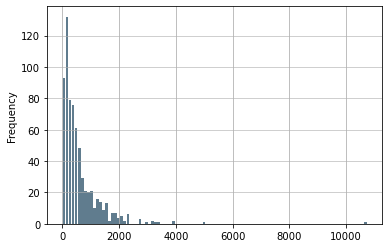

In [17]:
commutes = xu_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [19]:
temp = xu_post[(xu_post['like_count'] <= 4000) & (xu_post['like_count'] > 500)]
temp

,new_date,message,jieba_results,like_count
422,2019-11-14,身為教育立委，將音樂帶入校園是智傑的責任！\n\n音樂教育經常是被忽略的一塊，但智傑一直深知音樂扎根的重要性，積極爭取經費讓鳳山的孩子從小就有接觸藝文活動的機會！\n\n六藝樂集－文化鳳山，音樂飄香－鳳山音樂藝術扎根計畫，從10月開始連續兩個月，巡迴咱鳳山22所國小舉辦校園音樂會，參加過的小朋友都反應熱烈，開啟對音樂的興趣。\n\n「文化鳳山」一直是智傑的宗旨，咱鳳山有曹公、黃埔、衛武營三者精神都很值得鳳山人學習，智傑也推動紙風車到鳳山，讓表演藝術進入到你我的生活當中。除此之外，透過音樂進入校園，提供給鳳山的孩子們能夠在求學的階段，擁有不一樣的美學體驗，打造鳳山成為文化城市。,身為 教育 立委 將音樂帶 入校 園是 智傑 的 責任 音樂 教育 經常 是 被 忽略 的 一塊 但智傑 一直 深 知音 樂 扎根 的 重要性 積極爭 取經費 讓 鳳山 的 孩子 從 小 就 有 接觸 藝文 活動 的 機會 六藝樂集 文化 鳳山 音樂飄香 鳳山 音樂 藝術 扎根 計畫 從 月 開始 連續 兩個 月 巡 迴 咱鳳山 所 國小 舉辦 校園 音樂會 參加過 的 小朋友 都 反應 熱烈 開啟 對 音樂 的 興趣 。 文化 鳳山 一直 是 智傑 的 宗旨 咱鳳山 有 曹公 黃 埔 衛武營 三者 精神 都 很 值得 鳳山 人學習 智傑 也 推動紙 風車 到 鳳山 讓 表演 藝術 進入 到 你 我 的 生活 當中 。 除此之外 透過 音樂進 入校 園 提供 給鳳山 的 孩子 們 能夠 在 求學 的 階段 擁有 不 一樣 的 美學 體驗 打造 鳳山成 為 文化 城市 。,501
423,2019-12-23,再過19天就要投票!讓我們回顧2019年鳳山有哪些不一樣!您知道嗎?\n\n1.藝文 2019.10.10 鳳山之光衛武營啟用一週年吸引380萬人次參觀\n更多資訊 https://ppt.cc/f7ZQ4x\n\n2.停車 2019.10.09 智傑爭取的鳳山車站地下停車場啟用 \n更多資訊 https://ppt.cc/fVd0tx\n\n3.綠地 2019.11.29 智傑爭取43億元原鐵軌之綠園道工程動工\n更多資訊 https://ppt.cc/fsIkfx\n\n4.治水 2019.12.12 智傑向營建署爭取5200萬經費減緩北鳳山淹水\n更多資訊 https://ppt.cc/fq5FLx\n\n5.眷村 2019.11.19 黃埔新村將設置眷村願景館，爭取1.2億元修復東區，繼續爭取西區修復\n更多資訊 https://ppt.cc/foS0Yx\n\n6.親子 2019.09.28 中秋節近萬人參與紙風車公演，未來每年中秋都將舉辦\n更多資訊 https://ppt.cc/f6uCix\n\n7.親水 2019.12.10 智傑爭取水利署1.3億元整治鳳山溪\n更多資訊 https://ppt.cc/fNNwPx\n\n8.體育 2019.12.23 爭取鳳山體育園區經費1.8億元及高雄首座國民運動中心\n更多資訊 https://ppt.cc/fF5EZx\n\n9.音樂 2019.10.01 鳳山音樂藝術扎根計畫，巡迴鳳山22所國小舉辦校園音樂會\n更多資訊 https://ppt.cc/fzXP2x\n\n10.故宮 2019.11.04 故宮首次到鳳山衛武營展覽\n更多資訊 https://ppt.cc/fjfqPx,再過 天 就要 投票 讓 我們 回顧 年鳳山 有 哪些 不一樣 您 知道 嗎 ? . 藝文 . . 鳳山 之光 衛武營 啟用 一週 年 吸引 萬 人次 參觀 更 多 資訊 / / . / . 停車 . . 智傑 爭取 的 鳳山 車站 地下 停車場 啟用 更 多 資訊 / / . / . 綠地 . . 智傑 爭取 億元 原鐵軌 之 綠園 道 工程 動工 更 多 資訊 / / . / . 治水 . . 智傑 向 營建署 爭取 萬經費 減緩 北鳳山 淹水 更 多 資訊 / / . / . 眷村 . . 黃 埔 新村 將設 置 眷村 願景館 爭取 . 億元修 復 東區 繼續 爭取 西區 修 復 更 多 資訊 / / . / . 親子 . . 中秋 節近 萬人 參與紙 風車 公演 未來 每年 中秋 都 將舉 辦 更 多 資訊 / / . / . 親水 . . 智傑 爭取 水利 署 . 億元 整治 鳳 山溪 更 多 資訊 / / . / . 體育 . . 爭取 鳳山 體育 園區 經費 . 億元及 高雄 首座 國民運動 中心 更 多 資訊 / / . / . 音樂 . . 鳳山 音樂 藝術 扎根 計畫 巡 迴 鳳山 所 國小 舉辦 校園 音樂會 更 多 資訊 / / . / . 故宮 . . 故宮 首次 到 鳳山 衛武營 展覽 更 多 資訊 / / . /,505
424,2019-04-07,分享喜悅～台灣之光！世界球后戴資穎破紀錄，成為羽球史上第一人，蟬聯125週冠軍寶座的紀錄！\n\n#戴資穎 #球后 #破紀錄 #羽球 #體育\n\nhttps://tw.appledaily.com/new/realtime/20190407/1546721/,分享 喜悅 台灣 之光 世界 球后 戴 資穎 破紀錄 成為 羽球 史上 第一 人 蟬聯 週冠 軍寶座 的 紀錄 # 戴資穎 # 球后 # 破紀錄 # 羽球 # 體育 / / . . / / / / /,508
425,2019-11-15,媒體報導骨力的好立委智傑\n\n看到智傑平日一天十多個行程，假日甚至都是20個起跳，媒體報導真的非常拚，智傑有別於傳統的選戰模式，加強跟親子互動，舉行各種親子活動；同是針對長期推廣的鳳山美食票選，繼續透過網路行銷推廣，讓更多人更認識鳳山。\n\n採訪當天13個行程，從一早送車、到晚上喜宴，通通親自到場，以最誠懇實在的方式，爭取鳳山人的信賴！\n\n#小編看到委員跑行程汗流浹背真的很感動 #東森新聞 #誠懇實在 #值得信賴 #許智傑 #鳳山 #美食,媒體 報導 骨力 的 好 立委 智傑 看到 智傑 平日 一天 十多 個 行程 假日 甚至 都 是 個 起跳 媒體 報導 真的 非常 拚 智傑 有別 於 傳統 的 選戰 模式 加強 跟 親子 互動 舉行 各種 親子 活動 同是 針對 長期 推廣 的 鳳山 美食 票選 繼續 透過 網路 行銷 推廣 讓 更 多 人 更 認識 鳳山 。 採訪 當天 個 行程 從 一早 送車 到 晚上 喜宴 通通 親自到場 以 最誠懇 實在 的 方式 爭取 鳳山人 的 信賴 # 小編 看到 委員 跑 行程 汗流 浹 背 真的 很 感動 # 東森新聞 # 誠懇實 在 # 值得 信賴 # 許智傑 # 鳳山 # 美食,509
426,2019-06-14,初選落幕了！民進黨該團結一致，迅速整合，我們絕對沒有分裂的本錢，呼籲兩位參選人跟支持者可以團結一致，對抗中國的一國兩制！\n\n寰宇新聞 https://www.youtube.com/watch?v=Qe1q6mVkRJY,初選 落幕 了 民進 黨 該 團結 一致 迅速 整合 我們 絕對 沒有 分裂 的 本 錢 呼籲 兩位 參選人 跟 支持者 可以 團結 一致 對抗 中國 的 一國 兩制 寰宇 新聞 / / . . / ? =,512
...,...,...,...,...
680,2019-12-28,再14天就要投票了！團結支持14號 民主進步黨！讓台灣更有好意思！\n\n選戰倒數最後兩週了！拜託您集中選票，總統支持③蔡英文、延續建設支持③許智傑！政黨票請支持14號民主進步黨，組成一個圓周(率)3.14，讓台灣未來更圓滿！\n\n作伙用③張選票愛鳳山！③張選票顧台灣！\n智傑懇請您轉發、下載分享給親友！一天幫忙拉一票喔！,再 天 就要 投票 了 團結 支持 號 民主 進步 黨 讓 台灣 更 有 好意思 選戰 倒數 最後兩週 了 拜 託 您 集中 選票 總統 支持 ③ 蔡英文 延續 建設 支持 ③ 許智傑 政黨票 請 支持 號 民主 進步 黨 組成 一個 圓周 率 . 讓 台灣 未來 更 圓滿 作伙 用 ③ 張選票 愛鳳山 ③ 張選票 顧 台灣 智傑懇 請 您 轉發 下載 分享 給親友 一天 幫忙 拉 一票 喔 ！,3144
681,2019-12-06,最後36天！智傑深深向您一鞠躬，拜託近36萬鳳山鄉親，給智傑繼續服務的機會！\n\n今天下午3:15辣台號在鳳山龍山寺直播\n明天下午4:00小金剛吹泡泡在武松公園\n明天晚上6:00護國保台鳳山開講在赤山廟喔！\n\n#2020台灣要贏 #辣台派,最 後 天 智傑 深深 向 您 一 鞠躬 拜 託 近 萬鳳山 鄉親 給智傑 繼續 服務 的 機會 今天下午 辣台號 在 鳳山龍 山寺 直播 明天 下午 小金 剛 吹泡泡 在 武松 公園 明天 晚上 護國 保台 鳳山 開講 在 赤山 廟 喔 # 台灣 要贏 # 辣台 派,3259
682,2019-12-18,總統③號蔡英文\n立委③號許智傑\n拜託鳳山的好朋友集中選票投③號！\n\n#3號智傑愛鳳山\n#3張選票顧台灣,總統 ③ 號 蔡英文 立委 ③ 號許 智傑 拜 託 鳳山 的 好 朋友 集中 選票 投 ③ 號 # 號智傑 愛鳳山 # 張選票 顧 台灣,3385
683,2019-09-01,雙J合體，力挺香港\n黃捷議員與智傑再度聯手出擊，一同參加埕市快閃第二回活動，高雄連儂牆留言

In [20]:
corpus = temp['jieba_results'].values.tolist()

In [21]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [22]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['諸葛', '剛來', '資訊', '朋友', '發聲', '台灣', '問好', '致詞', '情人', '七夕']
TOP 10 WORDS PER TOPIC #1
['鳳山區', '活動', '韓國瑜', '高雄', '小金', '委員', '美食', '五甲', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #2
['大家', '一起', '立委', '台灣', '支持', '一票', '鳳山', '許智傑', '蔡英文', '智傑']
TOP 10 WORDS PER TOPIC #3
['台灣', '高雄', '綠豆湯', '五甲', '割草', '認為', '一場', '鳳山', '辛苦', '精神']
TOP 10 WORDS PER TOPIC #4
['許智傑', '美食', '幸福', '小金', '開始', '五甲', '大家', '鳳山', '一起', '智傑']
TOP 10 WORDS PER TOPIC #5
['來鳳山', '翁立友', '停車場', '羊肉', '行程', '啟用', '貨智傑', '美食', '賴清德來', '車站']
TOP 10 WORDS PER TOPIC #6
['現在', '智傑', '候選人', '勞工', '大家', '加入', '勝利', '紙風車', '一個', '凍蒜']
TOP 10 WORDS PER TOPIC #7
['可以', '免費', '翻鳳山', '一顆', '公園', '智傑', '公里', '鳳山', '小金', '衛武營']


In [23]:
LDA.fit(X)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['衛武營', '美食', '台灣', '大家', '一起', '小金', '高雄', '許智傑', '鳳山', '智傑']
TOP 10 WORDS PER TOPIC #1
['許智傑', '大家', '繼續', '時間', '中國', '爭取', '運動', '台灣', '鳳山', '智傑']
TOP 10 WORDS PER TOPIC #2
['美食', '投資', '推薦', '台商', '小金', '爭取', '國小', '衛武營', '鳳山', '智傑']
TOP 10 WORDS PER TOPIC #3
['高雄', '可以', '大家', '香港', '美食', '小金', '鳳山', '一起', '智傑', '台灣']
TOP 10 WORDS PER TOPIC #4
['時間', '爭取', '鳳山區', '小金', '一起', '高雄', '美食', '鳳山', '五甲', '智傑']
TOP 10 WORDS PER TOPIC #5
['一起', '朋友', '服務', '爭取', '繼續', '許智傑', '大家', '衛武營', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #6
['立委', '建設', '高雄', '大家', '朋友', '許智傑', '一起', '市長', '智傑', '鳳山']
TOP 10 WORDS PER TOPIC #7
['一票', '立委', '高雄', '許智傑', '支持', '鳳山', '一起', '蔡英文', '台灣', '智傑']


In [24]:
politics_lin = politics[politics.姓名 == "林 岱 樺"].政見.to_string()
politics_lin = re.sub(re_punctuation, "", politics_lin)
politics_lin = re.sub(r'[0-9]','',politics_lin)
politics_lin = re.sub(r'[a-zA-Z]','',politics_lin)
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_lin, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '林岱', '樺', '長', '年', '在', '國會', '經濟', '委員', '會', '，', '重視', '大', '寮', '、', '林園', '、', '仁武', '、', '鳥松', '經濟', '發展', '，', '林岱', '樺', '認為', '只有', '高雄', '好', '，', '台灣', '才', '會', '更好', '，', '不管', '大小', '地', ' ', '方事', '，', '林岱', '樺', '都', '為', '您', '做到', '最好', '。', ' ', '一', '、', '『', '交通', '』', '－', '讓', '城鄉', '沒有', '距離', '\u3000', '\u3000', '推動捷', '運林園', '延伸', '線', '、', '鳳松', '輕軌', '捷運線', '。', ' ', '\u3000', '\u3000', '推動區域', '交通', '平衡', '發展', '，', '縮', '小城', '鄉', '差距', '，', '促進', '地區', '繁榮', ' ', '二', '、', '『', '教育', '』', '－', '贏在', '起跑', '點的', '下一代', '\u3000', '\u3000', '改善', '教育', '環境', '，', '提升', '教學', '設備', '，', '促進', '區域', '教學品', '質及', '平衡', '教學', '資源', '分配', '。', ' ', '三', '、', '『', '長', '照', '』', '－', '普及', '、', '平價', '、', '優質', '的', '長期', '照護', '系統', '\u3000', '\u3000', '促進', '政府', '推動', '各區', '老人', '日托', '、', '扶助', '老人', '社區', '參', '與', '及', '補助', '計畫', '，', '以', '因應', '日', '趨', '嚴重', '的', '人口老化', '問題', '。', ' ', '四', '、', '『', '就業', '』', '－', '人人', '安薪樂業',

In [25]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(words)  
word = vectorizer.get_feature_names() 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['為南', '增加', '地方', '扶助', '區域', '推動', '生活', '教育', '提升', '林岱']
TOP 10 WORDS PER TOPIC #1
['大小', '委員', '族群', '管道', '仁大澄觀', '特定', '平衡', '交通', '重視', '就業機會']
TOP 10 WORDS PER TOPIC #2
['照護', '品質', '捷運線', '教學品', '影響', '人人', '排水', '地連結', '優質', '促進']
TOP 10 WORDS PER TOPIC #3
['因應', '日托', '資金', '中小', '點的', '開發', '設備', '環境', '政府', '打造']
TOP 10 WORDS PER TOPIC #4
['募集', '只有', '遊廊', '狀況', '最好', '生產', '補助', '起跑', '台灣', '各區']
TOP 10 WORDS PER TOPIC #5
['山水', '普及', '營造', '鳳松', '安薪樂業', '廠商', '居住', '系統', '老人', '改善']
TOP 10 WORDS PER TOPIC #6
['錄用', '空間', '增進', '距離', '經濟', '活動', '教學', '高雄', '發展', '社區']
TOP 10 WORDS PER TOPIC #7
['督促', '避免', '沒有', '地區', '質及', '平價', '再有', '平等', '鼓勵', '產業']


In [26]:
doc_names = range(len(xu)) #林岱樺有幾篇文章
doc_names

range(0, 687)